## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(66)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import root_mean_squared_log_error

## Load Data

In [4]:
train_df = pd.read_csv('train.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [35]:
train_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
X, y = train_df.drop(['id','Calories'], axis=1), train_df[['Calories']]

## Features check

In [34]:
train_df.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
le = LabelEncoder()

In [10]:
X['Sex'] = le.fit_transform(X['Sex'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

In [28]:
X_train.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
13567,1,42,186.0,81.0,8.0,85.0,39.8
109140,0,56,167.0,71.0,9.0,88.0,39.6
400000,0,23,161.0,58.0,3.0,87.0,38.3
344227,0,28,156.0,56.0,20.0,105.0,40.5
452142,0,59,148.0,50.0,25.0,109.0,41.0


## EDA

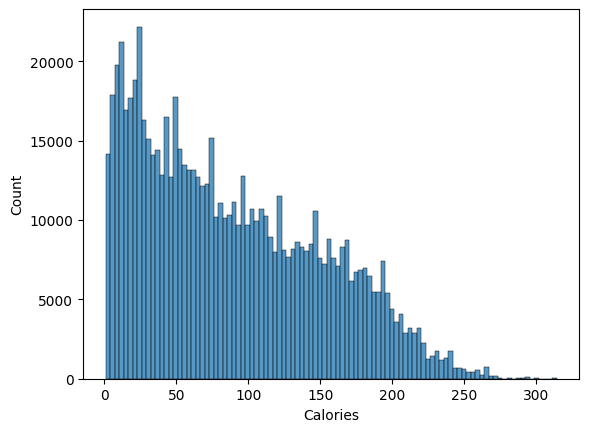

In [38]:
sns.histplot(train_df["Calories"], bins=100)
plt.show()

In [ ]:
sns.pairplot

## Model Training

In [12]:
lr_model = LinearRegression()

In [13]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = lr_model.predict(X_test)

In [26]:
y_pred[y_pred < 0]

array([ -5.41568903, -13.12523363,  -5.07092316, ..., -18.9947281 ,
        -5.60896532,  -6.68471597])

In [15]:
rmsle = root_mean_squared_log_error(y_true=y_test, y_pred=y_pred)

ValueError: Root Mean Squared Logarithmic Error cannot be used when targets contain values less than or equal to -1.